## About the Data set

IMDB dataset having 50K movie reviews for natural language processing or Text analytics.
This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training and 25,000 for testing. So, predict the number of positive and negative reviews using either classification or deep learning algorithms.

http://ai.stanford.edu/~amaas/papers/wvSent_acl2011.bib

## Import Necessary Libraries and Data set from Kaggle

In [147]:
import tensorflow as tf 
from tensorflow import keras

In [148]:
print(tf.__version__)
print(keras.__version__)

2.10.0
2.10.0


In [263]:
import pandas as pd
import numpy as np

In [265]:
df = pd.read_csv("IMDB_Dataset.csv")
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [267]:
#Finding out how the reviews are distributed between negative and positive reviews

df.groupby('sentiment').describe()

review                                                            \
           count unique                                                top   
sentiment                                                                    
negative   25000  24698  This show comes up with interesting locations ...   
positive   25000  24884  Loved today's show!!! It was a variety and not...   

                
          freq  
sentiment       
negative     3  
positive     5

In [268]:
#Replacing 'positive' and 'negative' with 1 and 0 respectively

df['sentiment']=df['sentiment'].apply(lambda x: 1 if x=='positive' else 0)
df.sample(5)

,review,sentiment
45001,MacArthur is a great movie with a great story ...,1
33357,"Remember - before there was Sidney, there was ...",1
34531,This is one of the periphery stories told by t...,1
11680,"There are bad movies, terrible movies even bor...",0
11714,This film is utterly amazing. From the perform...,1


In [269]:
#Since our Data set is large (50,000) we want to reduce it to 10,000 entries.

df_new=df.head(10000)

In [287]:
#Finding out if our sample dataset is somewhat balanced

df_new['sentiment'].value_counts()

1    5028
0    4972
Name: sentiment, dtype: int64

## Split into train and test data set

In [270]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_new['review'],df_new['sentiment'],test_size=0.2)

In [271]:
X_train.head(4)

8726    There's one line that makes it worth to rent f...
1840    This film was on last week and although at tha...
3826    "Life stinks" is a parody of life and death, h...
6736    Follow-up to 1965's "My Name Is Barbra", and s...
Name: review, dtype: object

## Importing BERT model 

We Download a trained BERT model from tensorflow. We download a preprocesssing step and encoding step

In [274]:

!pip install tensorflow-text
!pip install tensorflow-hub

import tensorflow_hub as hub
import tensorflow_text as text

bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

## Build Model

In this case we would be building a functional model. We will first of all create our BERT layers which does the following:
- Create an input layer which takes our dataset 
- Put this input into a preprocessing layer
- Send teh preprocessed layer for encoding

Next we would build our Neural Network
- Our first layer will be a drop out layer ; 10% of our neurons will be dropped. The output from our BERT layer wil be inserted heere as an input 
- Our second layer will be our dense layer with one neuron since we have just two classes. We will use a sigmoid activation so that any prediction above 0.5 will mean that it is 1 and any below 0.5 will represent 0.

Next we construct our final model with our inputs and desired outputs


In [275]:
# Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')#our df
preprocessed_text = bert_preprocess(text_input)#preprocessing our df
outputs = bert_encoder(preprocessed_text)#encoding the preprocessed data

# Neural network layers with dropout layer to help with overfitting
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])#outputs is our imput from bert layer
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)#one neuron 

# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])

In [276]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer_1 (KerasLayer)     {'input_mask': (Non  0           ['text[0][0]']                   
                                e, 128),                                                          
                                 'input_type_ids':                                                
                                (None, 128),                                                      
                                 'input_word_ids':                                                
                                (None, 128)}                                                  

In [277]:
len(X_train)

8000

In [278]:

METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS)

## Train the model

In [280]:
model.fit(X_train, y_train, epochs=20)

Epoch 1/20
250/250 [==============================] - 1173s 5s/step - loss: 0.5385 - accuracy: 0.7285 - precision: 0.7340 - recall: 0.7208
Epoch 2/20
250/250 [==============================] - 1247s 5s/step - loss: 0.5332 - accuracy: 0.7347 - precision: 0.7404 - recall: 0.7268
Epoch 3/20
250/250 [==============================] - 1570s 6s/step - loss: 0.5281 - accuracy: 0.7371 - precision: 0.7416 - recall: 0.7318
Epoch 4/20
250/250 [==============================] - 1681s 7s/step - loss: 0.5284 - accuracy: 0.7412 - precision: 0.7464 - recall: 0.7345
Epoch 5/20
250/250 [==============================] - 1761s 7s/step - loss: 0.5219 - accuracy: 0.7437 - precision: 0.7499 - recall: 0.7350
Epoch 6/20
250/250 [==============================] - 1619s 6s/step - loss: 0.5230 - accuracy: 0.7437 - precision: 0.7478 - recall: 0.7392
Epoch 7/20
250/250 [==============================] - 1224s 5s/step - loss: 0.5243 - accuracy: 0.7410 - precision: 0.7460 - recall: 0.7345
Epoch 8/20
250/250 [=======

In [281]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 286s 5s/step - loss: 0.4928 - accuracy: 0.7595 - precision: 0.8616 - recall: 0.6234


[0.4927673935890198, 0.7595000267028809, 0.8616438508033752, 0.623389482498169]

**There seems to be no overfitting with a training score of 0.750 and test score of 0.759**

In [282]:
#Predict the classes and flatten it to a 1D array

y_predicted = model.predict(X_test)
y_predicted = y_predicted.flatten()

63/63 [==============================] - 305s 5s/step


In [283]:
#Since y_predicted would have sigmoid values between 0 and 1 we chnag ethem to tak ethe class values of 0 and 1

import numpy as np

y_predicted = np.where(y_predicted > 0.5, 1, 0)
y_predicted

array([0, 0, 0, ..., 1, 0, 0])

In [284]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_predicted)
cm 

array([[890, 101],
       [380, 629]], dtype=int64)

Text(33.0, 0.5, 'Truth')

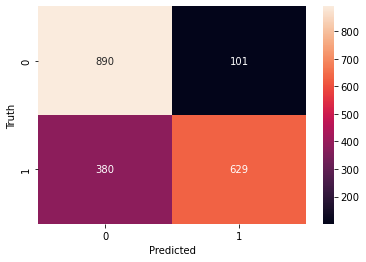

In [285]:
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

**The model correctly predicted negative reviews than it did positive reviews.**

## Using my own reviews to test the model

In [286]:
#greater than 0.5 means 1 (positive)
#less than 0.5 means 0 (negative)

reviews = [
    'I really enjoyed this movie',
    'The movie was long and had a sad ending',
    'This is the worst movie i have ever watched.',
    'The originality of the movie was what i loved most about it',
    "Terrible movie. Would not recommend ."
]
model.predict(reviews)

1/1 [==============================] - 1s 1s/step


array([[0.5807976 ],
       [0.28344223],
       [0.07404021],
       [0.71310383],
       [0.2822255 ]], dtype=float32)

**In this case the model correctly predicted all my reviews**

In [289]:
#Trying longer reviews from rotten tomatoes movie reviews

#1st is positive review
#2nd is negative review
#3rd is positive review
#4th is negative review


reviews=['Like Nazi and Soviet propaganda films, “Under the Sun” offers a vision of social perfection that comes at the expense of messy truth and human complexity. Although unintentionally funny throughout, its evocation of life in a totalitarian society is ultimately chilling. The happy picture the North Koreans struggle to present implies unfathomable depths of violence to the human spirit beneath its glossy surface.',
                  'Max Steel is one of the more forgettable and pointless attempts at a superhero franchise in the current post-MCU Hollywood market, lacking any of the originality or vibrance that could give it even a remote shot at a successful future."[8] Variety\'s Joe Leydon gave a negative review, describing it as: "A half-baked, time-wasting curtain-raiser for a superhero franchise that is never, ever going to happen.',
                  'Amazingly, Toy Story 2 was first conceived as a straight-to-video project, before the whole concept was retooled and eventually put out in cinemas. Thank goodness that the filmmakers saw the light: the second instalment in the Toy Story quadrilogy is a huge improvement on its predecessor, darkening the themes while introducing yet more wonderful characters. The story is again centrally anchored in the emotional arc of Woody and Buzz, with the former now questioning his own obsolescence. But so assured is Pixar\'s storytelling that it never feels preachy – instead, questions of ownership and identity are couched within a rip-roaring and funny adventure, occasionally pausing to wrench on the heartstrings. Cowgirl Jessie\'s (Joan Cusack) story of her former owner still gets to us.',
                  'Jaws: The Revenge\' bears the marks of its rushed production, from the seemingly first-draft screenplay to its sloppy execution to the slender running time (under 90 minutes without credits) to the generally cheap look and feel. Dumb beyond belief, hollow, bloody and nonsensical, it\'s Universal Studios\' vanity movie, a way of providing employment yet again for its Great White icon.' 
        ]
model.predict(reviews)

1/1 [==============================] - 1s 1s/step


array([[0.66419977],
       [0.22109473],
       [0.7076367 ],
       [0.52686465]], dtype=float32)